In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
from datetime import datetime
rc('font', family='NanumSquareR')

from pandas import Series, DataFrame

In [2]:
reg = pd.read_csv('./Regular_Season_Batter.csv')

In [3]:
reg.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [4]:
reg.info()
# float과 int와 object로 구성된 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

예시)
타율 : 시즌별 변동성이 크다 즉 예측력이 낮다
볼넷 : 시즌별 변동성이 작다 즉 예측력이 높다 
lag : 전시즌 성적 
타율과 같은 변동성이 큰 변수들을 예측하는 방법 : 1. 전시즌의 타율을 이용 2.해당선수의 역대 타율을 이용 <- 이것이 더 좋은 예측력을 보임
변동성이 높은 변수들은 역대 데이터를 이용 
변동성이 낮은 변수들은 lag를 이용



findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


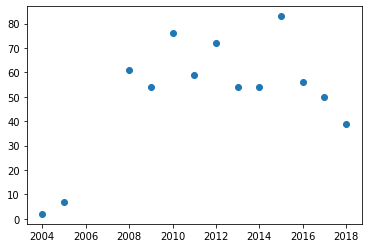

In [5]:
plt.scatter(reg.loc[reg['batter_name']=='박석민']['year'],reg.loc[reg['batter_name']=='박석민']['BB'])

#박석민선수의 년도별 볼넷수

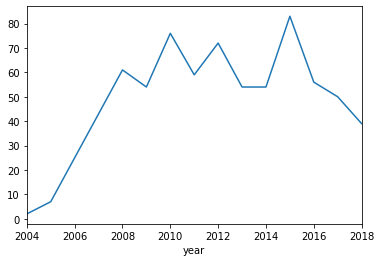

In [6]:
reg.loc[reg['batter_name']=='박석민'].groupby('year')['BB'].mean().plot()
#이름이 박석민인 데이터프레임에서 년도로 그룹화해서 볼넷의 수를 평균을 낸것 

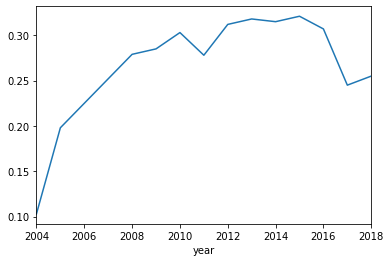

In [7]:
reg.loc[reg['batter_name']=='박석민'].groupby('year')['avg'].mean().plot()
#박석민선수의 년도별 타율의 평균 


### 자료들의 변동성을 보기 위한 절차 ###

In [8]:
var='avg'#변동성이 큰 변수인 avg사용 
x=[]#그래프를 그리기 위해 x(1년전 avg),y(현재 avg)를 지정 
y=[]
reg1=reg.loc[reg['AB']>=100]


In [9]:
reg1['batter_name'].unique()
#batter_name의 중복되지않은 이름 

array(['가르시아', '강경학', '진갑용', '강민호', '강백호', '강병식', '강봉규', '강승호', '강정호',
       '강한울', '고동진', '고메즈', '고영민', '이종환', '고종욱', '구자욱', '국해성', '박재홍',
       '권용관', '권희동', '김강민', '김경언', '김규민', '박재상', '문선재', '김동엽', '김동욱',
       '김동주', '김동한', '김문호', '김민성', '김민식', '김민하', '김상수', '김상호', '김연훈',
       '김선빈', '김성욱', '김성현', '김성훈', '연경흠', '김용의', '김원석', '김원섭', '김재율',
       '김재현', '김재호', '김재환', '나바로', '김종호', '김주찬', '김주형', '김지수', '김태균',
       '김태완', '김하성', '김헌곤', '김현수', '김혜성', '김회성', '나경민', '나성범', '나종덕',
       '나주환', '나지완', '노수광', '노진혁', '대니돈', '러프', '로맥', '로메로', '로사리오',
       '로티노', '로하스', '류지혁', '모창민', '문규현', '문우람', '민병헌', '박건우', '박경수',
       '박계현', '박기남', '박기혁', '박동원', '박민우', '박병호', '박석민', '박세혁', '박승욱',
       '박용근', '박용택', '박정권', '박정음', '박준서', '박준태', '박지규', '박진만', '박한이',
       '박해민', '박헌도', '배영섭', '백상원', '백용환', '백창수', '버나디나', '번즈', '서건창',
       '서동욱', '서상우', '손시헌', '손아섭', '손주인', '송광민', '송성문', '송지만', '스나이더',
       '스크럭스', '신경현', '신명철', '신본기', '신성현', '신종길', '심우준', '안익훈', '안중열',
       '안치용', '안치홍

In [10]:
for name in reg1['batter_name'].unique(): 
    a=reg1.loc[reg1['batter_name']==name]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:#year에서 +1이 존재한다면
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])#1년전 avg
        y.append(a.loc[a['year']==i+1,var].iloc[0])#현재 avg  
#타석수가 100타석이상인 데이터를 reg1에 저장
#중복되지않는 타자들의 데이터수를 가지고 for문을 하여 a에 저장
#저장된 a에서 중복되지않은 year의 데이터길이를 이용하여 
#for를 사용해서 2016,2017,2018와 같은 연속적인 데이터들을 넣을수있다
#x=2016년데이터 y= 2017데이터 그 후 x=2017년 y=2018년 이렇게 되는 형태이다


In [11]:
x

[0.257,
 0.242,
 0.26899999999999996,
 0.212,
 0.273,
 0.306,
 0.281,
 0.29,
 0.278,
 0.28800000000000003,
 0.28800000000000003,
 0.24600000000000002,
 0.27899999999999997,
 0.23199999999999998,
 0.263,
 0.273,
 0.307,
 0.243,
 0.251,
 0.271,
 0.292,
 0.26,
 0.305,
 0.289,
 0.273,
 0.235,
 0.22899999999999998,
 0.311,
 0.32299999999999995,
 0.285,
 0.247,
 0.218,
 0.27399999999999997,
 0.287,
 0.235,
 0.23399999999999999,
 0.282,
 0.276,
 0.31,
 0.237,
 0.267,
 0.25,
 0.271,
 0.28600000000000003,
 0.301,
 0.282,
 0.314,
 0.29100000000000004,
 0.264,
 0.205,
 0.272,
 0.303,
 0.317,
 0.2,
 0.24100000000000002,
 0.251,
 0.27,
 0.272,
 0.27,
 0.268,
 0.267,
 0.235,
 0.205,
 0.21,
 0.285,
 0.287,
 0.31,
 0.33399999999999996,
 0.312,
 0.349,
 0.34299999999999997,
 0.31,
 0.295,
 0.326,
 0.266,
 0.295,
 0.309,
 0.284,
 0.278,
 0.301,
 0.253,
 0.304,
 0.259,
 0.28,
 0.318,
 0.27,
 0.22,
 0.18600000000000005,
 0.245,
 0.218,
 0.17600000000000002,
 0.235,
 0.237,
 0.23399999999999999,
 0.2410000

In [12]:
y

[0.158,
 0.26899999999999996,
 0.212,
 0.273,
 0.306,
 0.281,
 0.29,
 0.278,
 0.28800000000000003,
 0.28800000000000003,
 0.24600000000000002,
 0.27899999999999997,
 0.23199999999999998,
 0.263,
 0.273,
 0.307,
 0.271,
 0.251,
 0.271,
 0.292,
 0.26,
 0.305,
 0.289,
 0.273,
 0.235,
 0.22899999999999998,
 0.311,
 0.32299999999999995,
 0.285,
 0.26899999999999996,
 0.218,
 0.27399999999999997,
 0.26899999999999996,
 0.174,
 0.23399999999999999,
 0.282,
 0.276,
 0.31,
 0.237,
 0.267,
 0.255,
 0.255,
 0.28600000000000003,
 0.301,
 0.282,
 0.314,
 0.29100000000000004,
 0.35600000000000004,
 0.205,
 0.272,
 0.303,
 0.259,
 0.2,
 0.24100000000000002,
 0.249,
 0.27,
 0.272,
 0.24100000000000002,
 0.268,
 0.267,
 0.235,
 0.205,
 0.21,
 0.265,
 0.287,
 0.29,
 0.33399999999999996,
 0.312,
 0.27899999999999997,
 0.34299999999999997,
 0.31,
 0.33299999999999996,
 0.326,
 0.266,
 0.295,
 0.309,
 0.284,
 0.278,
 0.301,
 0.253,
 0.304,
 0.259,
 0.28,
 0.318,
 0.27,
 0.22,
 0.18600000000000005,
 0.25,
 

Text(0, 0.5, 'y+1년도의 성적')

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flag

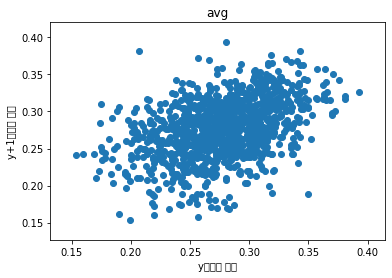

In [13]:
plt.scatter(x,y)
plt.title(var)
plt.xlabel('y년도의 성적')
plt.ylabel('y+1년도의 성적')
#x축 해당년도 y축 해당년도+1년도 
#변동성이 커보인다 

### var에 다른 칼럼들을 넣어도 가능 ###

0.6537531676446489


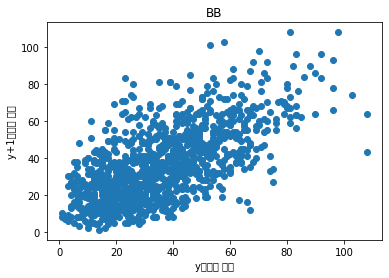

In [14]:
var='BB'
x=[]
y=[]
reg1=reg.loc[reg['AB']>=100]

for name in reg1['batter_name'].unique(): 
    a=reg1.loc[reg1['batter_name']==name]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])#1년전 avg
        y.append(a.loc[a['year']==i+1,var].iloc[0])
        
plt.scatter(x,y)
plt.title(var)
plt.xlabel('y년도의 성적')
plt.ylabel('y+1년도의 성적')
#변동성이 avg에 비해 적어보인다 
print(pd.Series(x).corr(pd.Series(y)))
#x,y의 상관계수
#즉 볼넷은 전년도와 해당년도에 대해 높은 상관관계를 가진다

### 코드가 길기때문에 함수화 ###

In [15]:
def get_self_corr(var):
    x=[]
    y=[]
    reg1=reg.loc[reg['AB']>=100]

    for name in reg1['batter_name'].unique(): 
        a=reg1.loc[reg1['batter_name']==name]
        k=[]
        for i in a['year'].unique():
            if (a['year']==i+1).sum()>0:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])#1년전 avg
            y.append(a.loc[a['year']==i+1,var].iloc[0])
    return(pd.Series(x).corr(pd.Series(y)))
#var의 상관계수를 리턴해준다 


In [16]:
get_self_corr('avg')

0.42406761190587683

In [17]:
get_self_corr('OPS')

0.5967835522092053

In [18]:
get_self_corr('BB')

0.6537531676446489

In [19]:
get_self_corr('OBP')

0.5452616730047514

In [20]:
reg.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [21]:
agg={}
for i in ['G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E']:
    agg[i]=get_self_corr(i)
#전체 상관계수를 출력하도록 해주는 반복문 

In [22]:
reg['1B']=reg['H']-reg['2B']-reg['3B']-reg['HR']
agg['1B']=get_self_corr('1B')
#1루타 

In [23]:
agg
#이것을 통해서 제외할 변수들을 선정 

{'G': 0.2827945222858424,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043601,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.44087969523833104,
 'HR': 0.7412597496536675,
 'TB': 0.6343944721859059,
 'RBI': 0.651947415097796,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546752,
 'BB': 0.6537531676446489,
 'HBP': 0.5627917256433479,
 'SO': 0.5664029028016614,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047514,
 'E': 0.6225595423969393,
 '1B': 0.5363838342038814}

#### 신뢰성이 높은 지표 : HR,SB,BB(lag_ 변수를 이용)
#### 신뢰성이 낮은 지표 : 3B, avg, 1B(누적 성적을 이용)

신뢰성이 낮다는것은 변동성이 높다 즉 작년도 성적과 현재 성적의 영향이 적다 

total(누적성적)과 lag변수들간의 차이점
lag변수 : 2019년도를 예측하기 위해 2018년도의 데이터를 이용하는것
total변수 : 2019년도를 예측하기 위해 2018년도를 포함한 역대 데이터를 이용하는것

total 변수 : 총 1루타를 모두 더하고 총 타석수를 더한것을 나눠주면 되며,총 (avg*ab) 모두 더하고 총 타석수를 더한것을 나눈다

## total 변수 만들기 

In [24]:
reg.loc[(reg['batter_name']=='강경학')&(reg['year']<2016),'1B'].sum()/reg.loc[(reg['batter_name']=='강경학')&(reg['year']<2016),'AB'].sum()
#강경학의 total 1B변수 

0.20100502512562815

In [25]:
a=reg.loc[(reg['batter_name']=='강경학')&(reg['year']<2016)]
(a['avg']*a['AB']).sum()/a['AB'].sum()
#강경학의 total avg

0.24857537688442213

In [26]:
total_1BnAB=[]
total_3BnAB=[]
total_avg=[]

for i in range(len(reg)):
    a=reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year']<reg['year'].iloc[i])]
    total_1BnAB.append(a['1B'].sum()/a['AB'].sum())
    total_3BnAB.append(a['3B'].sum()/a['AB'].sum())
    total_avg.append(a['avg']*a['AB'].sum()/a['AB'].sum())
    
#신뢰성이 낮은 변수들에 대해 total함수로 변환 

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [27]:
reg['total_1BnAB']=total_1BnAB
reg['total_3BnAB']=total_3BnAB
reg['total_avg']=total_avg

In [28]:
reg.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,height/weight,year_born,position,career,starting_salary,OPS,1B,total_1BnAB,total_3BnAB,total_avg
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,45,NaN,NaN,"Series([], Name: avg, dtype: float64)"
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,0,NaN,NaN,"Series([], Name: avg, dtype: float64)"
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,13,0.000000,0.000000,"1 0.0 Name: avg, dtype: float64"
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,67,0.149425,0.034483,"1 0.000 2 0.221 Name: avg, dtype: float64"
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,10,0.201005,0.017588,"1 0.000 2 0.221 3 0.257 Name: avg, dt..."


In [29]:
del reg['team'] 
del reg['career']

In [30]:
reg['year'].value_counts()
#2018년도까지의 데이터만 존재 

2018    227
2017    217
2016    213
2015    207
2013    194
2014    186
2012    174
2011    151
2010    130
2009    124
2008    115
2007     98
2006     85
2005     73
2004     68
2003     54
2002     43
2001     32
2000     20
1999     14
1998     10
1997      8
1996      7
1994      2
1993      1
1995      1
Name: year, dtype: int64

In [31]:
agg={} #딕셔너리
agg['사람']=1#굳이 숫자가 아니고 다른게 나와도된다
agg['동물']=2

In [32]:
agg
#사람과 동물은 key라고 하고 1과2는 value이다

{'사람': 1, '동물': 2}

In [33]:
agg={}
for i in reg.columns:
    agg[i]=[]
#reg.의 고유한 컬럼들을 빈 []로 지정
#agg의 키는 reg의 컬럼이고 value는 빈[]이다

In [34]:
agg

{'batter_id': [],
 'batter_name': [],
 'year': [],
 'avg': [],
 'G': [],
 'AB': [],
 'R': [],
 'H': [],
 '2B': [],
 '3B': [],
 'HR': [],
 'TB': [],
 'RBI': [],
 'SB': [],
 'CS': [],
 'BB': [],
 'HBP': [],
 'SO': [],
 'GDP': [],
 'SLG': [],
 'OBP': [],
 'E': [],
 'height/weight': [],
 'year_born': [],
 'position': [],
 'starting_salary': [],
 'OPS': [],
 '1B': [],
 'total_1BnAB': [],
 'total_3BnAB': [],
 'total_avg': []}

In [35]:
#2019년을 예측하는게 목표인데 2019년의 데이터가 없으니 2019년도 데이터를 만들어주는것

agg={}
for i in reg.columns:
    agg[i]=[]
for i in reg.loc[reg['year']==2018,'batter_name'].unique(): 
    #i를 2018년도에 활동한 유니크한 선수명으로 받겠다
    for j in reg.columns:
        if j in['batter_id', 'batter_name','height/weight','year_born','position','starting_salary']:
            agg[j].append(reg.loc[reg['batter_name']==i,j].iloc[0])
        elif j in['avg','G','AB','R','H','2B','3B','HR','TB','RBI','SB','CS','BB','HBP','SO','GDP','SLG','OBP','E','OPS']:
            agg[j].append(0)
        elif j =='year':
            agg[j].append(2019)

In [36]:
agg['batter_name']

['가르시아',
 '강경학',
 '강구성',
 '강민국',
 '강민호',
 '강백호',
 '강상원',
 '강승호',
 '강진성',
 '강한울',
 '고명성',
 '고종욱',
 '구자욱',
 '국해성',
 '권정웅',
 '권희동',
 '김강민',
 '김규민',
 '문선재',
 '김동엽',
 '김동욱',
 '김동한',
 '김문호',
 '김민성',
 '김민수',
 '김민식',
 '홍성갑',
 '김민하',
 '김사훈',
 '김상수',
 '김선빈',
 '김성욱',
 '김성현',
 '김성훈',
 '김용의',
 '김응민',
 '김인태',
 '김재율',
 '김재현',
 '김재호',
 '김재환',
 '김종덕',
 '김주찬',
 '김주형',
 '김지수',
 '김진곤',
 '김철호',
 '김태균',
 '김태연',
 '김태완',
 '김태진',
 '김하성',
 '김헌곤',
 '김현수',
 '김형준',
 '김혜성',
 '김회성',
 '나경민',
 '나성범',
 '나원탁',
 '나종덕',
 '나주환',
 '나지완',
 '남태혁',
 '노수광',
 '노진혁',
 '도태훈',
 '러프',
 '로맥',
 '로하스',
 '류지혁',
 '모창민',
 '문규현',
 '민병헌',
 '박건우',
 '박경수',
 '박광열',
 '박기혁',
 '박동원',
 '박민우',
 '박병호',
 '박석민',
 '박세혁',
 '박승욱',
 '박용택',
 '박정권',
 '박정음',
 '박준태',
 '박지규',
 '박찬도',
 '박한이',
 '박해민',
 '박헌도',
 '배영섭',
 '배정대',
 '백민기',
 '백상원',
 '백용환',
 '백창수',
 '버나디나',
 '번즈',
 '샌즈',
 '서건창',
 '서동욱',
 '서상우',
 '손시헌',
 '손아섭',
 '손주인',
 '송광민',
 '송민섭',
 '송성문',
 '스크럭스',
 '신범수',
 '신본기',
 '신성현',
 '심우준',
 '안익훈',
 '안중열',
 '안치홍',
 '양석환',
 '양성우',
 '양의지',
 '양종민',
 '오선진',
 '오재원',
 

In [22]:
agg.drop('1B')
#1B': [],'total_1BnAB': [],'total_3BnAB': [],'total_avg': []}
#아마 이게 있어서 밑의 df로 변경이 안되는것같다 

AttributeError: 'dict' object has no attribute 'drop'

In [38]:
reg.columns

Index(['batter_id', 'batter_name', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG',
       'OBP', 'E', 'height/weight', 'year_born', 'position', 'starting_salary',
       'OPS', '1B', 'total_1BnAB', 'total_3BnAB', 'total_avg'],
      dtype='object')

In [39]:
agg

{'batter_id': [0,
  1,
  2,
  3,
  4,
  5,
  8,
  9,
  11,
  12,
  16,
  18,
  19,
  20,
  22,
  23,
  24,
  28,
  101,
  30,
  31,
  33,
  35,
  36,
  37,
  38,
  335,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  48,
  51,
  52,
  55,
  56,
  57,
  58,
  59,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  79,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  89,
  90,
  91,
  95,
  96,
  99,
  100,
  103,
  104,
  105,
  107,
  109,
  111,
  112,
  113,
  115,
  116,
  117,
  119,
  123,
  124,
  126,
  127,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  148,
  149,
  151,
  152,
  153,
  154,
  157,
  160,
  161,
  162,
  165,
  166,
  167,
  169,
  171,
  172,
  174,
  175,
  178,
  179,
  180,
  182,
  183,
  184,
  187,
  188,
  190,
  192,
  193,
  194,
  195,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  207,
  208,
  209,
  210,
  211,
  212,
  283,
  216,
  217,
 

In [41]:
pd.DataFrame(agg,columns=reg.columns)

ValueError: arrays must all be same length

In [27]:
type(agg)

dict